# Численные методы. Лабораторная работа №11. Косолапов И. ПМ-31

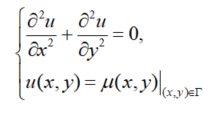

In [2]:
%matplotlib notebook
import numpy as np
import scipy

from scipy import sparse
from scipy.sparse import linalg
from numpy import pi, sin

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import animation

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

<IPython.core.display.Javascript object>


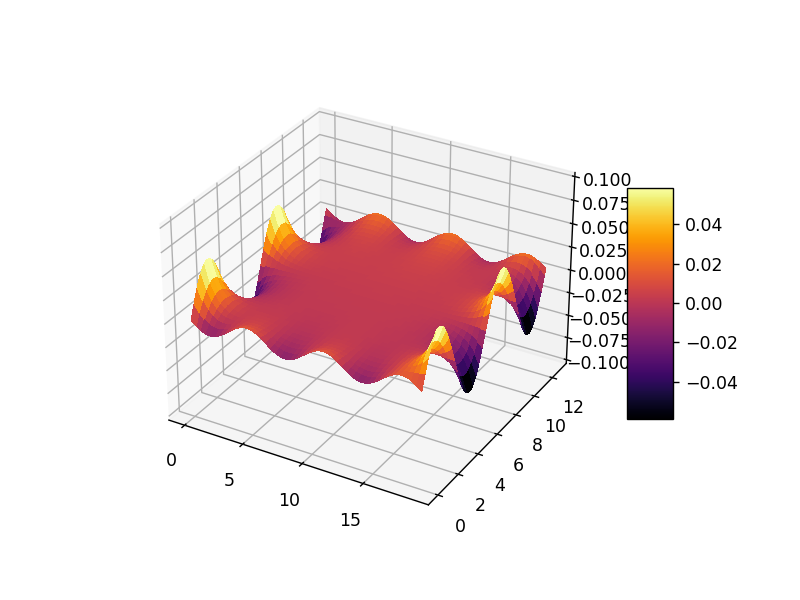

C:\Users\acer\AppData\Local\Temp/ipykernel_14292/261305150.py:75: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [5]:
def mu(x,y):
    z = np.zeros((len(y),len(x)), dtype=np.longdouble)
    for i in range(len(x)):
        for j in range(len(y)):
            z[j][i] = -0.01*sin(x[i]) + 0.05*sin(y[j])
    return z

a = 6*pi
b = 4*pi
T = 10
hx = pi/30
hy = hx
k = 1.0
eps = 1e-12

lambda_x = (pi/a)**2*k
lambda_xN = 4.0*(k/hx**2)
lambda_y = (pi/b)**2*k
lambda_yN = 4.0*(k/hy**2)

lambda_min = min(lambda_x, lambda_y)
lambda_max = max(lambda_xN, lambda_yN)

tau_min = 2.0/lambda_max
tau_max = 2.0/lambda_min

S = int(np.ceil(1/8.0 * np.log(1/eps) * np.log(lambda_max/lambda_min)))
t = np.array([np.exp(np.log(tau_min) + i*np.log(tau_max/tau_min)/(S-1)) for i in range(S)], dtype=np.longdouble)

x = np.arange(0, a+hx, hx)
y = np.arange(0, b+hy, hy)

u = np.zeros((len(t)+1, len(y), len(x)))
u[0] = mu(x,y)
for i in range(1,len(t)):
    u[i,0,:] = np.squeeze(mu(x,[0]))
    u[i,-1,:] = np.squeeze(mu(x,[b]))
    u[i,:,0] = np.squeeze(mu([0],y))
    u[i,:,-1] = np.squeeze(mu([a],y))

diff_op_x = np.zeros((len(x),len(x)),dtype= np.float64)
for n in range(1, len(x)-1):
    diff_op_x[n][n-1] = 1
    diff_op_x[n][n] = -2
    diff_op_x[n][n+1] = 1
diff_op_x = np.matrix(diff_op_x)
diff_op_x = k/hx**2 * diff_op_x.T


diff_op_y = np.zeros((len(y),len(y)), dtype= np.float64)
for n in range(1, len(y)-1):
    diff_op_y[n][n-1] = 1
    diff_op_y[n][n] = -2
    diff_op_y[n][n+1] = 1
diff_op_y = np.matrix(diff_op_y)
diff_op_y = k/hy**2 * diff_op_y

du_ = []
for i in range(len(t)):
    tau  = t[i]
    Px = np.matrix(np.eye(len(x)) - np.matrix(tau*diff_op_x/2.0));
    Py = np.matrix(np.eye(len(y)) - np.matrix(tau*diff_op_y/2.0));
    F = np.matrix(u[i])*diff_op_x + diff_op_y*np.matrix(u[i])
    F[0,:] = np.zeros(F[0,:].shape)
    F[-1,:] = np.zeros(F[-1,:].shape)
    F[:,0] = np.zeros(F[:,0].shape)
    F[:,-1] = np.zeros(F[:,-1].shape)
    nu = np.linalg.solve(Px.T, F.T).T
    du = np.linalg.solve(Py, nu)
    du_.append(du)
    u[i+1] = np.matrix(u[i]) + tau*np.matrix(du)
    

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X, Y = np.meshgrid(x, y)

# Plot the surface.
surf = ax.plot_surface(X, Y, u[0], cmap=cm.inferno, linewidth=1, antialiased=True)

# Customize the z axis.
ax.set_zlim(-0.1,0.1)
ax.set_xlim(0,a)
ax.set_ylim(0,b)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

def animate(n):
    ax.clear()
    ax.set_zlim(-0.1,0.1)
    surf = ax.plot_surface(X, Y, u[n], cmap=cm.inferno, linewidth=0, antialiased=False)
    return surf,

anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=100, repeat = False)

plt.show()

<IPython.core.display.Javascript object>


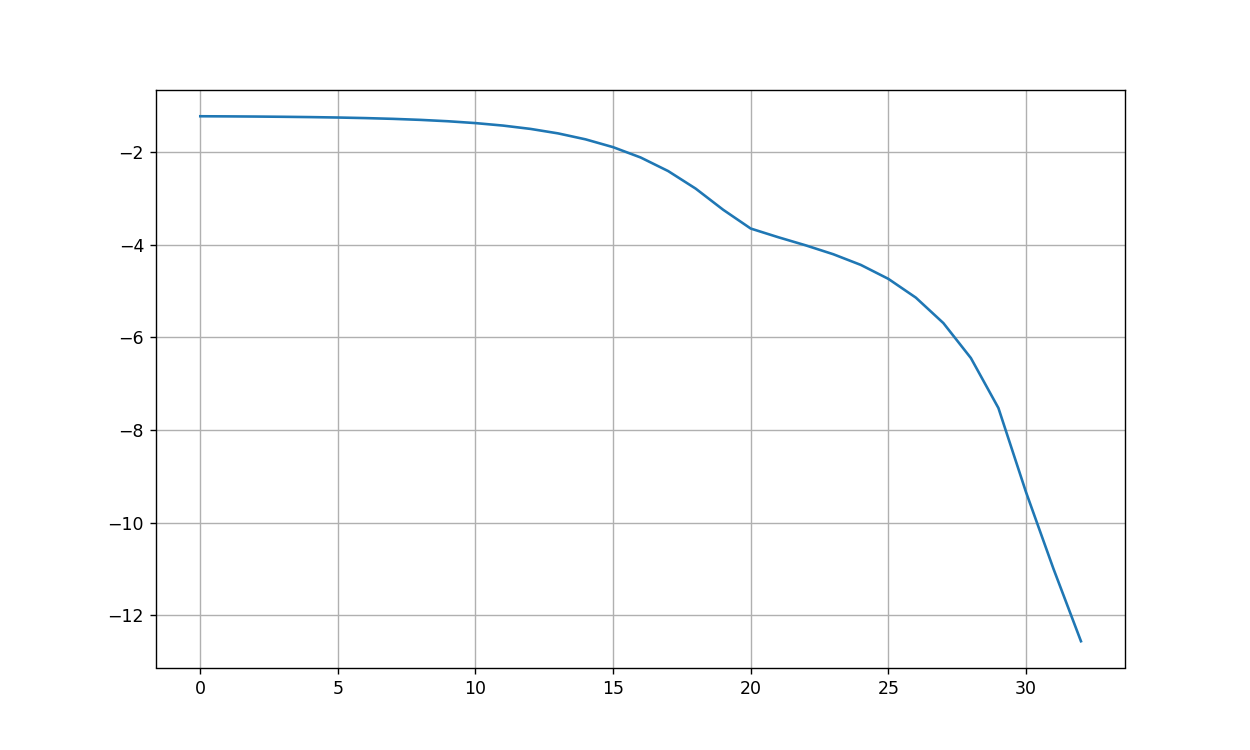

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.log10([max(abs(np.asarray(p).reshape(-1))) for p in [t for t in du_]]))
ax.grid(';')